In [8]:
from scipy.optimize import minimize
import numpy as np
from spectre.Visualization.ReadH5 import to_dataframe
from spectre.Pipelines.ScalarSelfForce.Assemble import sum_Fr4

In [2]:
# a=0.9, r0=isco, m=1
expected_dpsi_drstar = -0.0242004 - 0.00723707j
expected_F_r = -0.0700412
# a=0.5, r0=6, m=1
dpsi_dr = -0.00320376 + 0.00162401j
F_r = -0.00120398
# m=0
dpsi_dr = 0.00355094
F_r = 0.00123093

# outer radius 350

In [9]:
import h5py

reduction_file = "/Users/nilsvu/Projects/spectre/build-Default-Release/test_ssf/ScalarSelfForceReductions.h5"

with h5py.File(reduction_file, "r") as open_h5_file:
    self_force = to_dataframe(open_h5_file["SelfForce.dat"])
self_force

,IterationId,Re(RegularFieldAtPuncture),Im(RegularFieldAtPuncture),Re(DerivRegularFieldAtPuncture_rstar),Im(DerivRegularFieldAtPuncture_rstar),Re(DerivRegularFieldAtPuncture_costheta),Im(DerivRegularFieldAtPuncture_costheta),Re(SelfForce_r),Im(SelfForce_r),Re(SelfForce_theta),Im(SelfForce_theta)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000e+00
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.000000e+00,0.000000e+00
2,1.0,-0.007079,0.006681,-0.003245,0.001629,1.263757e-04,-1.943011e-05,-0.001224,0.000518,-2.475440e-04,6.415126e-05
3,1.0,-0.007079,0.006681,-0.003245,0.001629,-1.263743e-04,1.942556e-05,-0.001224,0.000518,2.475421e-04,-6.414191e-05
4,2.0,-0.006777,0.006691,-0.003095,0.001641,9.925249e-06,4.425201e-07,-0.001165,0.000520,-1.983855e-05,1.121328e-06
5,2.0,-0.006777,0.006691,-0.003095,0.001641,-9.925390e-06,-4.420030e-07,-0.001165,0.000520,1.983873e-05,-1.122386e-06
6,3.0,-0.006829,0.006673,-0.003184,0.001632,8.404666e-07,-2.304302e-08,-0.001207,0.000520,-1.667716e-06,2.153676e-07
7,3.0,-0.006829,0.006673,-0.003184,0.001632,-8.398451e-07,2.291977e-08,-0.001207,0.000520,1.666504e-06,-2.149970e-07
8,4.0,-0.006870,0.006659,-0.003188,0.001631,1.700675e-07,-2.748425e-08,-0.001207,0.000520,-3.328575e-07,8.898975e-08
9,4.0,-0.006870,0.006659,-0.003188,0.001631,-1.702842e-07,2.755368e-08,-0.001207,0.000520,3.332748e-07,-8.917162e-08


In [4]:
import matplotlib.pyplot as plt

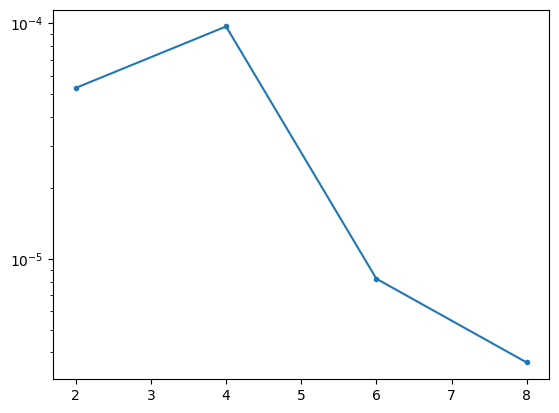

In [10]:
plt.semilogy(
    np.abs(
        self_force["Re(DerivRegularFieldAtPuncture_rstar)"].iloc[2:-2:2]
        - self_force["Re(DerivRegularFieldAtPuncture_rstar)"].iloc[-1]
    ),
    marker=".",
)